Bhekie Danisa: 201633631

ASSESSMENT: CLASS TEST 1

MODULE CODE: NDEV84212

MODULE DESCRYPTION: DATA EXPLORATION AND VISUALIZATION¶
bold text

In [1]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files
import matplotlib.pyplot as plt

In [2]:
uploaded = files.upload()

Saving Train.csv to Train (1).csv


In [3]:
path = io.BytesIO(uploaded['Train.csv'])
data = pd.read_csv(path)

In [4]:
data.head()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,0,100.0
1,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,3,0,3,0,0,2,0,10.0
2,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27000,0,75,22,0,53,9,0,0.0
3,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27137,2,0,0,0,2,0,0,0.0
4,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27138,45,0,2,0,43,1,0,0.0


Looking at the first five observations, we can see that in 2019, product AS27134 had 75 initial stock. They did not receive any stock but 21 stock was distributed. There was a loss of 54 stocks, and they did not have any stock at the end, but they did not runout of the stock. Their product monthly consumption was 18 and they ordered 100 stock.

The same site received five different stock in January 2019. Product AS27134 and AS27000 were mostly distributed, followed by product AS27132.  

**1. VARIABLE IDENTIFICATION**

In [5]:
def unique_col_values(df):
    for c in df:
        print("{} | {} | {}".format(df[c].name, len(df[c].unique()), 
                                    df[c].dtype))

unique_col_values(data)

year | 4 | int64
month | 12 | int64
region | 20 | object
district | 80 | object
site_code | 155 | object
product_code | 11 | object
stock_initial | 798 | int64
stock_received | 259 | int64
stock_distributed | 338 | int64
stock_adjustment | 389 | int64
stock_end | 804 | int64
average_monthly_consumption | 313 | int64
stock_stockout_days | 1 | int64
stock_ordered | 334 | float64


The results above give us an information about the fields in our datasets, the number of unique values and data types. 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35753 entries, 0 to 35752
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         35753 non-null  int64  
 1   month                        35753 non-null  int64  
 2   region                       35753 non-null  object 
 3   district                     35753 non-null  object 
 4   site_code                    35753 non-null  object 
 5   product_code                 35753 non-null  object 
 6   stock_initial                35753 non-null  int64  
 7   stock_received               35753 non-null  int64  
 8   stock_distributed            35753 non-null  int64  
 9   stock_adjustment             35753 non-null  int64  
 10  stock_end                    35753 non-null  int64  
 11  average_monthly_consumption  35753 non-null  int64  
 12  stock_stockout_days          35753 non-null  int64  
 13  stock_ordered   

The above information tells us about all the variables which appear as columns in our datasets. The datasets consist of 14 columns and 35753 entries (rows). 

The variables are defined in different categories as follows: 

**TYPE OF VARIABLES**

**PREDICTOR VARIABLE** 

region 
district 
stock_initial 
stock_received 
stock_adjustment 
stock_end 
average_monthly_consumption stock_stockout_days 
stock_orderd 

**TARGET VARIABLE**

stock_distributed 

**DATA TYPE** 

**CHARACTER**

region district 
site_code 

product_code

**NUMERIC**

year

month 

stock_initial 

stock_received 

stock_distributed 

stock_adjustment 

stock_end 

average_monthly_consumption 

stock_stockout_days 

stock_orderd 

**VARIABLE CATEGORY**

**CATEGORICAL**

year

month 

region 

district

**CONTINOUS** 

stock_initial 

stock_received 

stock_distributed 

stock_adjustment

stock_end 

average_monthly_consumption

stock_stockout_days 

stock_orderd

All fields have 35753 fields except the field "stock_ordered" with 34990 fields, therefore, we can conclude that there are 763 onservations with missing values in stock_ordered field. 

In [7]:
data.describe()

,year,month,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
count,35753.000000,35753.000000,35753.000000,35753.000000,35753.000000,35753.000000,35753.000000,35753.000000,35753.0,34990.000000
mean,2017.433782,6.169412,63.245518,14.846055,14.764327,0.961150,64.288395,14.606439,0.0,26.658102
std,1.019933,3.429079,168.661538,70.631782,39.848242,37.883099,170.848479,32.521384,0.0,107.166082
min,2016.000000,1.000000,0.000000,0.000000,0.000000,-1440.000000,0.000000,0.000000,0.0,0.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,2017.000000,6.000000,12.000000,0.000000,1.000000,0.000000,13.000000,3.000000,0.0,0.000000
75%,2018.000000,9.000000,69.000000,0.000000,13.000000,0.000000,70.000000,16.000000,0.0,20.000000
max,2019.000000,12.000000,4320.000000,3534.000000,1728.000000,3003.000000,4320.000000,864.000000,0.0,10240.000000


**CENTRAL TENDENCY**

In most fields, the mean is greater than the median, which tells us that the distribution is positively skewed. the only field that seems to be symmetric is stock_stockout_days Some site(s) started with initial stock of 430 Some site(s) received 3524 stock The maximum number of the stock distributed is 1728 The stock loss ranges between -1440 and 3003 The maximum number of the current stock/stock_end is 4320 The maximum number of the average monthly consumption is 864 There was never a day where a single site ran out of stock The maximum number of the stock ordered is 10240 

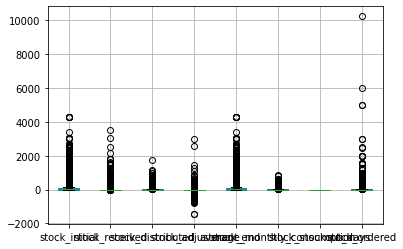

In [8]:
box = data.boxplot(column=['stock_initial', 'stock_received', 'stock_distributed', 'stock_adjustment', 'stock_end', 'average_monthly_consumption', 'stock_stockout_days', 'stock_ordered'])

The plot above shows the box plots for each field, and tells us that there are obvious outliers in most of the fields, and there is a very small variation. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


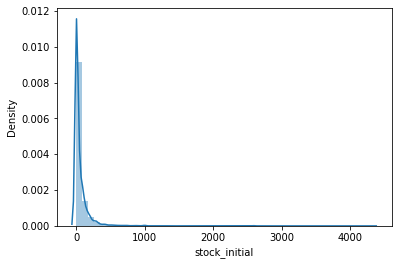

In [9]:
sns.distplot(data['stock_initial'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


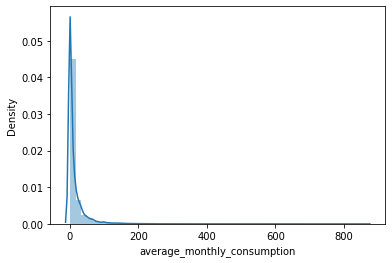

In [10]:
sns.distplot(data['average_monthly_consumption'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


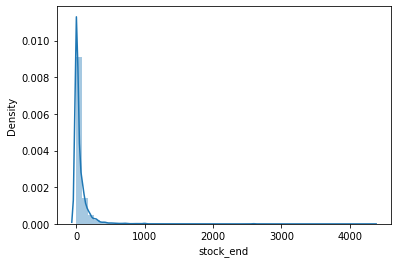

In [11]:
sns.distplot(data['stock_end'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


Text(0.5, 1.0, 'Stock patterns for each month in 2016')

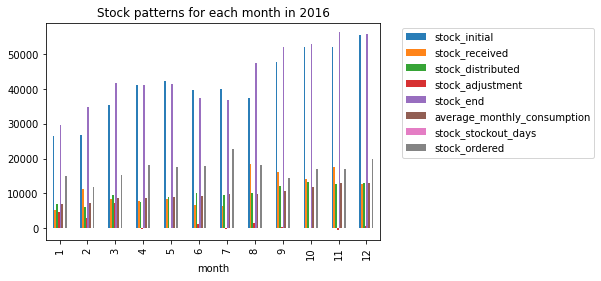

In [12]:
year1 = data[data['year'] == 2016]
A = year1[year1['product_code'].isin(['AS27134','AS27132','AS27000', 'AS27137', 'AS27138', 'AS27133', 'AS21126', 'AS42018', 'AS46000', 'AS17005', 'AS27139'])]

prod_per_month = A.groupby(['month'])['stock_initial','stock_received','stock_distributed','stock_adjustment',
    'stock_end','average_monthly_consumption','stock_stockout_days','stock_ordered'].sum().plot(kind='bar',alpha=0.95, rot=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)
plt.title('Stock patterns for each month in 2016')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


Text(0.5, 1.0, 'Stock patterns for each month in 2016')

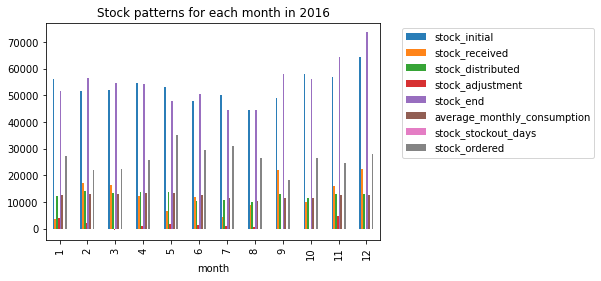

In [13]:
year2 = data[data['year'] == 2017]
B = year2[year2['product_code'].isin(['AS27134','AS27132','AS27000', 'AS27137', 'AS27138', 'AS27133', 'AS21126', 'AS42018', 'AS46000', 'AS17005', 'AS27139'])]

prod_per_month = B.groupby(['month'])['stock_initial','stock_received','stock_distributed','stock_adjustment',
    'stock_end','average_monthly_consumption','stock_stockout_days','stock_ordered'].sum().plot(kind='bar',alpha=0.95, rot=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)
plt.title('Stock patterns for each month in 2016')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


Text(0.5, 1.0, 'Stock patterns for each month in 2016')

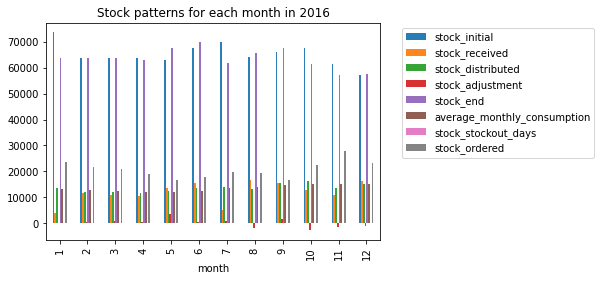

In [14]:
year3 = data[data['year'] == 2018]
C = year3[year3['product_code'].isin(['AS27134','AS27132','AS27000', 'AS27137', 'AS27138', 'AS27133', 'AS21126', 'AS42018', 'AS46000', 'AS17005', 'AS27139'])]

prod_per_month = C.groupby(['month'])['stock_initial','stock_received','stock_distributed','stock_adjustment',
    'stock_end','average_monthly_consumption','stock_stockout_days','stock_ordered'].sum().plot(kind='bar',alpha=0.95, rot=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)
plt.title('Stock patterns for each month in 2016')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


Text(0.5, 1.0, 'Stock patterns for each month in 2016')

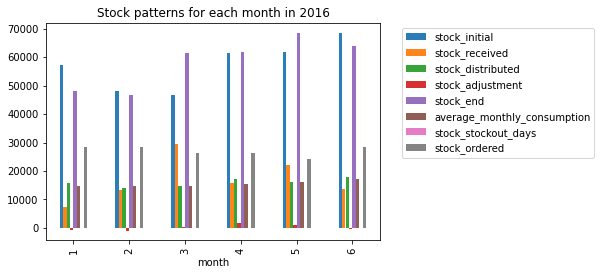

In [15]:
year4 = data[data['year'] == 2019]
D = year4[year4['product_code'].isin(['AS27134','AS27132','AS27000', 'AS27137', 'AS27138', 'AS27133', 'AS21126', 'AS42018', 'AS46000', 'AS17005', 'AS27139'])]

prod_per_month = D.groupby(['month'])['stock_initial','stock_received','stock_distributed','stock_adjustment',
    'stock_end','average_monthly_consumption','stock_stockout_days','stock_ordered'].sum().plot(kind='bar',alpha=0.95, rot=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)
plt.title('Stock patterns for each month in 2016')

The above histograms are showing the stock patterns from 2016 to 2019 for each month, and we can see that the data was collected for only six months in 2019. The graphs shows that no site ever ran out of stock for the entire four years even though there were some stock loss in some months. We can alos see that the overall initial stock and current/end stock has been always high for the entire four years. 

**CATEGORICAL** **VARIABLES**

In [16]:
product = pd.DataFrame(data.groupby('product_code').size()).reset_index()
product.columns = ['codes', 'count']
product

,codes,count
0,AS17005,1248
1,AS21126,347
2,AS27000,5259
3,AS27132,4436
4,AS27133,5368
5,AS27134,4708
6,AS27137,4449
7,AS27138,4060
8,AS27139,2347
9,AS42018,1550


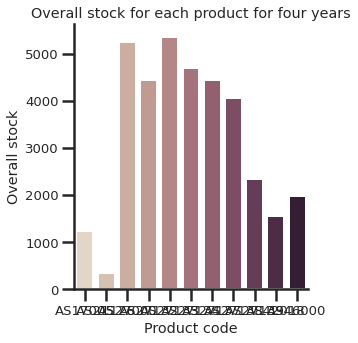

In [17]:
from matplotlib.pyplot import figure
sns.set(context='poster', style='ticks', font_scale=0.6)
sns.catplot(x="codes", y="count", kind='bar', palette="ch:.25", data=product)
plt.title('Overall stock for each product for four years')
plt.xlabel('Product code')
plt.ylabel('Overall stock')
sns.despine()
plt.tight_layout();

From the table and bar graph above, we can see that the product with the code "AS21126" have been used the least while the products with the codes "AS27133" and "AS27000" have been used the most for the entire four years.

**MISSING** **VALUE** **TREATMENT**

In [18]:
data.loc[data['stock_initial'] == 4320].head()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
31339,2016,1,HAUT-SASSANDRA,ISSIA,C2056,AS46000,4320,0,0,0,4320,0,0,0.0
31348,2016,2,HAUT-SASSANDRA,ISSIA,C2056,AS46000,4320,0,0,0,4320,0,0,0.0
31359,2016,3,HAUT-SASSANDRA,ISSIA,C2056,AS46000,4320,0,0,0,4320,0,0,0.0
31370,2016,4,HAUT-SASSANDRA,ISSIA,C2056,AS46000,4320,0,0,0,4320,0,0,0.0
31403,2016,5,HAUT-SASSANDRA,ISSIA,C2056,AS46000,4320,0,0,0,4320,0,0,0.0


We can see from above sample that site C2056 had a maximum initial stock of 4320 in 2016 for product AS46000 and was never distributed for five months. 

In [19]:
data.loc[data['product_code'] == 'AS46000'].head(10)

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
72,2019,1,ABIDJAN 2,ABOBO-EST,C1063,AS46000,0,0,0,0,0,0,0,0.0
82,2019,1,ABIDJAN 2,ABOBO-EST,C1011,AS46000,100,0,0,0,100,0,0,0.0
91,2019,2,ABIDJAN 2,ABOBO-EST,C1011,AS46000,100,0,0,0,100,0,0,0.0
112,2019,2,ABIDJAN 2,ABOBO-EST,C1063,AS46000,0,0,0,0,0,0,0,0.0
140,2019,3,ABIDJAN 2,ABOBO-EST,C1063,AS46000,0,0,0,0,0,0,0,0.0
150,2019,3,ABIDJAN 2,ABOBO-EST,C1011,AS46000,100,0,0,0,100,0,0,0.0
165,2019,4,ABIDJAN 2,ABOBO-EST,C1011,AS46000,100,0,0,0,100,0,0,0.0
175,2019,4,ABIDJAN 2,ABOBO-EST,C1063,AS46000,0,0,0,0,0,0,0,0.0
203,2019,5,ABIDJAN 2,ABOBO-EST,C1063,AS46000,0,0,0,0,0,0,0,0.0
213,2019,5,ABIDJAN 2,ABOBO-EST,C1011,AS46000,100,0,0,0,100,0,0,0.0


In 2019, product AS46000 was was 100 and still not utilized as shown in cite C1011. 

In [20]:
data.loc[data['stock_ordered'].isnull()].head()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
436,2019,1,ABIDJAN 1-GRANDS PONTS,ADJAME-PLATEAU-ATTECOUBE,C1034,AS27134,0,0,0,0,0,9,0,NaN
437,2019,1,ABIDJAN 1-GRANDS PONTS,ADJAME-PLATEAU-ATTECOUBE,C1034,AS27132,11,0,2,0,9,4,0,NaN
438,2019,1,ABIDJAN 1-GRANDS PONTS,ADJAME-PLATEAU-ATTECOUBE,C1034,AS27000,50,0,33,0,17,29,0,NaN
439,2019,1,ABIDJAN 1-GRANDS PONTS,ADJAME-PLATEAU-ATTECOUBE,C1034,AS27133,0,0,0,0,0,43,0,NaN
1262,2019,2,N'ZI-IFOU-MORONOU,BOCANDA,C2049,AS27139,0,0,0,0,0,0,0,NaN


In [21]:
data.isnull().sum()

year                             0
month                            0
region                           0
district                         0
site_code                        0
product_code                     0
stock_initial                    0
stock_received                   0
stock_distributed                0
stock_adjustment                 0
stock_end                        0
average_monthly_consumption      0
stock_stockout_days              0
stock_ordered                  763
dtype: int64

Since we have identified that the field "stock_ordered has 763 missing values, we have to deal with them.

**PAIRWISE** **DELETION**

In [22]:
new = data.copy()
new['stock_ordered'].mean()

26.65810231494713

Calculating the mean of the observations with no missing values and skip missing values.

**LISTWISE** **DELETION**

In [23]:
new.dropna(subset=['stock_ordered'],how='any',inplace=True)
new['stock_ordered'].isnull().sum()

0

This method is dropping lot of information

**IMPUTATION** **TECHNIQUE**

In [24]:
from sklearn.impute import SimpleImputer
constant = data.copy() 
mean_imput = SimpleImputer(strategy='constant') 
constant.iloc[:,:] = mean_imput.fit_transform(constant)
constant.isnull().sum()

year                           0
month                          0
region                         0
district                       0
site_code                      0
product_code                   0
stock_initial                  0
stock_received                 0
stock_distributed              0
stock_adjustment               0
stock_end                      0
average_monthly_consumption    0
stock_stockout_days            0
stock_ordered                  0
dtype: int64

In [25]:
from sklearn.impute import SimpleImputer
frequent = data.copy()
mean_imput = SimpleImputer(strategy='most_frequent')
frequent.iloc[:,:] = mean_imput.fit_transform(frequent)
frequent.isnull().sum()

year                           0
month                          0
region                         0
district                       0
site_code                      0
product_code                   0
stock_initial                  0
stock_received                 0
stock_distributed              0
stock_adjustment               0
stock_end                      0
average_monthly_consumption    0
stock_stockout_days            0
stock_ordered                  0
dtype: int64

Above we use mean, median or most frequent of each column where there are missing values.

In [26]:
frequent.isnull().sum()

year                           0
month                          0
region                         0
district                       0
site_code                      0
product_code                   0
stock_initial                  0
stock_received                 0
stock_distributed              0
stock_adjustment               0
stock_end                      0
average_monthly_consumption    0
stock_stockout_days            0
stock_ordered                  0
dtype: int64

No more missing values

**USING** **KNN**

In [27]:
from sklearn.impute import KNNImputer
knn = data.copy(deep=True)

imput = KNNImputer(n_neighbors=2, weights="uniform")
knn['stock_ordered'] = imput.fit_transform(knn[['stock_ordered']])
knn['stock_ordered'].isnull().sum()

0

KNN is used above to deal with missing values

**DEALING** **WITH** **OUTLIERS**

We noticed earlier when performed box plot that that are some outliers in most fields

In [28]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year                            1.0
month                           6.0
stock_initial                  69.0
stock_received                  0.0
stock_distributed              13.0
stock_adjustment                0.0
stock_end                      70.0
average_monthly_consumption    16.0
stock_stockout_days             0.0
stock_ordered                  20.0
dtype: float64


Displaying fields with outliers, there are only three fields with no outliers, the rest have outliers to be dealth with.

In [29]:
print(data < (Q1 - 1.5 * IQR)) or (data > (Q3 + 1.5 * IQR))

       average_monthly_consumption  district  ...  stock_stockout_days   year
0                            False     False  ...                False  False
1                            False     False  ...                False  False
2                            False     False  ...                False  False
3                            False     False  ...                False  False
4                            False     False  ...                False  False
...                            ...       ...  ...                  ...    ...
35748                        False     False  ...                False  False
35749                        False     False  ...                False  False
35750                        False     False  ...                False  False
35751                        False     False  ...                False  False
35752                        False     False  ...                False  False

[35753 rows x 14 columns]


,average_monthly_consumption,district,month,product_code,region,site_code,stock_adjustment,stock_distributed,stock_end,stock_initial,stock_ordered,stock_received,stock_stockout_days,year
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35748,False,False,False,False,False,False,False,False,False,False,False,True,False,False
35749,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35750,False,False,False,False,False,False,False,False,False,False,False,True,False,False
35751,False,False,False,False,False,False,False,False,False,False,False,False,False,False


We can see that there are some true values, showing where outliers are located.

In [30]:
outlier = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
outlier.shape

(21519, 14)

We have filtered the outliers above while keeping only the valid values.